# The popular past-time of "Guess the generative model"

Generative models are often a useful way of creating 'known truth' for clustering. However in practice the results of sampling from a particular generative model may result is data that is not distinguishable from a sampling from an entirely different generative model. We demonstrate that here by using four different generative models to create four datasets and then consider the resulting scatterplots and joint distribution plots, demonstrating that, without more sampled data, the four different models are extremely hard to distinguish from one another.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

We fix a random seed to ensure consistent result -- people wishing to experiment are welcome to try different seeds and see what results they get.

In [2]:
np.random.seed(1)

Our four models are as follows:
* A mixture of three standard Gaussians, with:
 - 25% of the mixture centered at (-2.0, 0.0)
 - 50% of the mixture centered at (0.0, 0.0)
 - 25% of the mixture centered at (2.0, 0.0)
* A mixture of two standard Gaussians, with:
 - 50% of the mixture centered at (-1.0, 0.0)
 - 50% of the mixture centered at (1.0, 0.0)
* A single multivariate Gaussian with covariance ((2.0, 0.0),(0.0, 1.0))
* An equal mixture of uniform noise and a standard Gaussian

In [3]:
data1 = np.vstack([np.random.normal(loc=(-2.0, 0), size=(25,2)),
                  np.random.normal(loc=(2.0, 0), size=(25,2)),
                  np.random.normal(size=(50,2))])
data2 = np.vstack([np.random.normal(loc=(-1.0, 0), size=(50,2)),
                  np.random.normal(loc=(1.0, 0), size=(50,2))])
data3 = np.random.multivariate_normal((0.0, 0.0), ((2.0, 0.0), (0.0, 1.0)), size=(100))
data4 = np.vstack([np.random.uniform(low=(-3.75, -1.75), high=(3.75, 1.75), size=(50, 2)),
                   np.random.normal(size=(50, 2))])

We can plot the scatter plots in a grid and see that, by eye, there is no clear discernable different between what are quite different generative models.

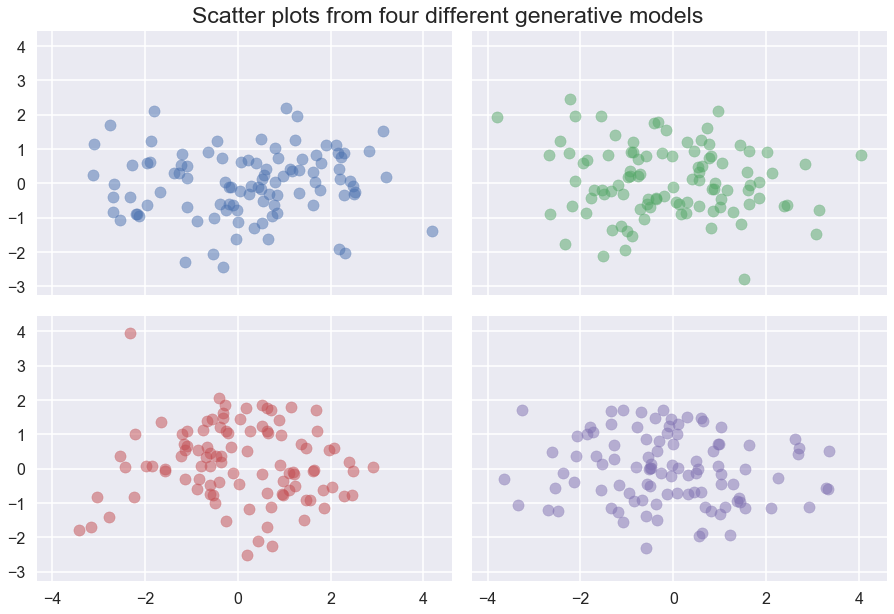

In [4]:
fig = plt.figure()
gs = plt.GridSpec(8, 8)
ax1 = plt.subplot(gs[0:4, 0:4])
ax1.scatter(*data1.T, c='b', alpha=0.5)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[0:4, 4:8], sharex=ax1, sharey=ax1)
ax2.scatter(*data2.T, c='g', alpha=0.5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
ax3 = plt.subplot(gs[4:8, 0:4], sharex=ax1, sharey=ax1)
ax3.scatter(*data3.T, c='r', alpha=0.5)
ax4 = plt.subplot(gs[4:8, 4:8], sharex=ax1, sharey=ax1)
ax4.scatter(*data4.T, c=sns.color_palette('deep')[3], alpha=0.5)
plt.setp(ax4.get_yticklabels(), visible=False)
fig.suptitle('Scatter plots from four different generative models')
gs.tight_layout(fig, rect=[0, 0, 1, 0.975])
plt.savefig('generative_model_scatter.png')

Similarly we can use KDEs and look at the marginal distirbutions and still see no easy to discern difference (that isn't misleading! the KDEs with extra peaks are the single multivariate Gaussian and the noisy Gaussian).

/Users/leland/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


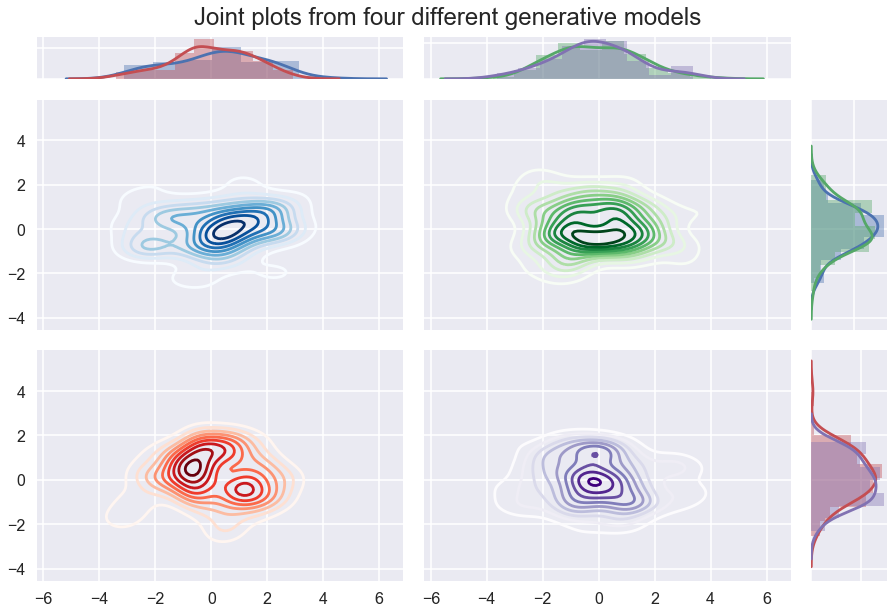

In [5]:
fig = plt.figure()
gs = plt.GridSpec(9, 9)
ax1 = plt.subplot(gs[1:5,0:4])
sns.kdeplot(*data1.T, ax=ax1, cmap='Blues')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(gs[1:5,4:8], sharex=ax1, sharey=ax1)
sns.kdeplot(*data2.T, ax=ax2, cmap='Greens')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
ax3 = plt.subplot(gs[5:9,0:4], sharex=ax1, sharey=ax1)
sns.kdeplot(*data3.T, ax=ax3, cmap='Reds')
ax4 = plt.subplot(gs[5:9,4:8], sharex=ax1, sharey=ax1)
sns.kdeplot(*data4.T, ax=ax4, cmap='Purples')
plt.setp(ax4.get_yticklabels(), visible=False)

ax5 = plt.subplot(gs[0,0:4], sharex=ax1)
sns.distplot(data1.T[0], ax=ax5, color='b')
sns.distplot(data3.T[0], ax=ax5, color='r')
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
ax6 = plt.subplot(gs[0,4:8], sharex=ax1)
sns.distplot(data2.T[0], ax=ax6, color='g')
sns.distplot(data4.T[0], ax=ax6, color=sns.color_palette('deep')[3])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

ax7 = plt.subplot(gs[1:5,8], sharey=ax1)
sns.distplot(data1.T[1], ax=ax7, color='b', vertical=True)
sns.distplot(data2.T[1], ax=ax7, color='g', vertical=True)
plt.setp(ax7.get_xticklabels(), visible=False)
plt.setp(ax7.get_yticklabels(), visible=False)
ax8 = plt.subplot(gs[5:9,8], sharey=ax1)
sns.distplot(data3.T[1], ax=ax8, color='r', vertical=True)
sns.distplot(data4.T[1], ax=ax8, color=sns.color_palette('deep')[3], vertical=True)
plt.setp(ax8.get_xticklabels(), visible=False)
plt.setp(ax8.get_yticklabels(), visible=False)
fig.suptitle('Joint plots from four different generative models', fontsize=24)
gs.tight_layout(fig, rect=[0, 0, 1, 0.965])
plt.savefig('generative_model_kde.png')